### This notebook demonstrates the use of different APIs and BeautifulSoup to extract and webscrape financial data from the web. 

In [ ]:
# import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup ## importing scraper
import lxml # reading web table to pandas
import html5lib # web parser
import warnings # to ignore warnings

In [ ]:
## pip install yfinance==0.2.4

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning) # ignore all warnings

In [5]:
# import yahoo finance API
import yfinance as yf

In [7]:
# import libraries for making graphs
import plotly.graph_objects as go # for making graphs
from plotly.subplots import make_subplots # for making graphs

#### Part 1. Using Yahoo Finance API to Get Financial Data 

#### The following code is used to query and analyze Apple stock data. 

In [8]:
apple = yf.Ticker("AAPL")

In [71]:
# another way to get apple data
# url = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json")
# apple_info = pd.json_normalize(json.loads(url.text))
# json.loads(url.text) read file as json (dictionary type)
# pd.json_normalize save file as DataFrame

In [26]:
# url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
# if file is to be read directly from the internet
# from urllib.request import urlopen # used for opening url as json
# response = urlopen(url) 
# data_json = json.loads(response.read())

In [11]:
# reading apple json file from local
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [12]:
apple_info['country'] # can use same indexing on dict file

'United States'

In [13]:
## apple_info_df = pd.DataFrame([apple_info]) passing apple as dataframe with each measure as cols.

In [29]:
# get apple's stock price history
apple_share_price_data = apple.history(period="1mo") # sort_values(by=["Date"],  ascending = True)

In [30]:
apple_share_price_data.head() 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-04 00:00:00-05:00,176.149994,176.899994,173.789993,175.100006,81510100,0.0,0.0
2024-03-05 00:00:00-05:00,170.759995,172.039993,169.619995,170.119995,95132400,0.0,0.0
2024-03-06 00:00:00-05:00,171.059998,171.240005,168.679993,169.119995,68587700,0.0,0.0
2024-03-07 00:00:00-05:00,169.149994,170.729996,168.490005,169.000000,71765100,0.0,0.0
2024-03-08 00:00:00-05:00,169.000000,173.699997,168.940002,170.729996,76114600,0.0,0.0


In [31]:
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

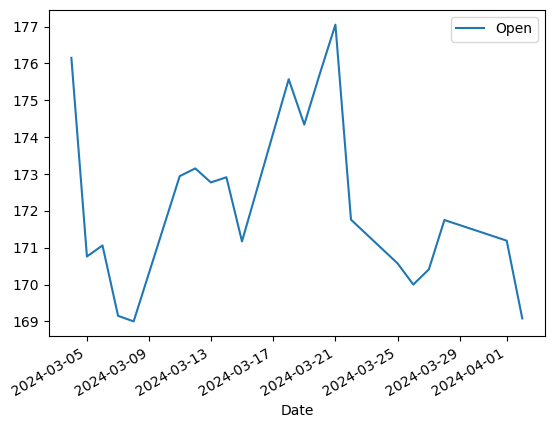

In [32]:
# plot Apple stock data
apple_share_price_data.plot(x="Date", y="Open")

<Axes: xlabel='Date'>

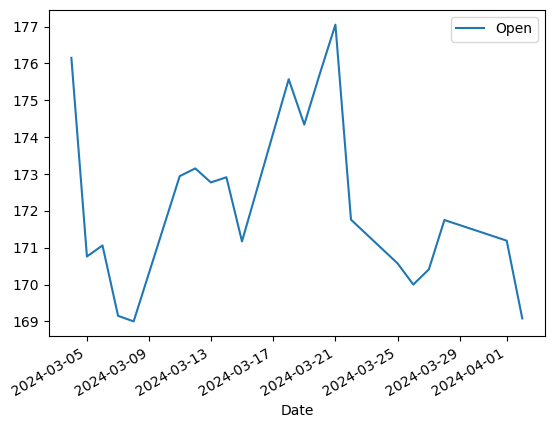

In [33]:
# plot Apple Dividends data
apple_share_price_data.plot(x="Date", y="Open")
apple.dividends.plot()

#### The following code is used to query and analyze AMD stock data. 

In [21]:
amd = yf.Ticker("AMD")

In [22]:
amd

yfinance.Ticker object <AMD>

In [34]:
# extract data directly from web, check status, and read as json,

In [35]:
url_amd = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json")

In [36]:
url_amd.status_code

200

In [37]:
amd_info = json.loads(url_amd.text)

In [38]:
amd_info["country"]

'United States'

In [39]:
amd_info["sector"]

'Technology'

In [40]:
# Get historical AMD stock data
amd.history(period="1000y").sort_values(by = ["Date"], ascending = True)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1979-09-18 00:00:00-04:00,NaN,NaN,NaN,NaN,0,NaN,1.5
1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.000000,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,3.062500,3.010417,3.010417,159600,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-26 00:00:00-04:00,179.539993,182.600006,176.330002,177.869995,65322400,0.0,0.0
2024-03-27 00:00:00-04:00,179.960007,181.229996,175.399994,179.589996,55685600,0.0,0.0
2024-03-28 00:00:00-04:00,179.470001,183.399994,178.300003,180.490005,57628600,0.0,0.0


### Part 2. Webscraping using Beautiful Soup to Get Stock Data

#### The following code is used to webscrape Netflix Data using BeautifulSoup. 

In [41]:
## Webscraping using beautiful soup. Define url and get request. 

In [42]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [43]:
data = requests.get(url).text # loading html from web

In [44]:
soup = BeautifulSoup(data, "html5lib") # parse html

In [46]:
# create a blank df with the stated column names
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [47]:
#append is changed to _append on new versions of pandas

In [48]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    # print(date, Open, high, low, close, adj_close, volume)
    # Finally we append the data of each row to the table
    netflix_data = netflix_data._append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adjusted_Close":adj_close, "Volume":volume}, ignore_index=True)    

In [49]:
netflix_data

,Date,Open,High,Low,Close,Volume,Adjusted_Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85
...,...,...,...,...,...,...,...
65,"Jan 01, 2016",109.00,122.18,90.11,91.84,"488,193,200",91.84
66,"Dec 01, 2015",124.47,133.27,113.85,114.38,"319,939,200",114.38
67,"Nov 01, 2015",109.20,126.60,101.86,123.33,"320,321,800",123.33
68,"Oct 01, 2015",102.91,115.83,96.26,108.38,"446,204,400",108.38


#### The following code is used to webscrape Amazon Data using BeautifulSoup. 

In [56]:
url = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html").text

In [57]:
soup = BeautifulSoup(url, "html5lib")

In [58]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [59]:
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    amazon_data = amazon_data._append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    
    

In [60]:
amazon_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"
...,...,...,...,...,...,...,...
56,"May 01, 2016",663.92,724.23,656.00,722.79,"90,614,500",722.79
57,"Apr 01, 2016",590.49,669.98,585.25,659.59,"78,464,200",659.59
58,"Mar 01, 2016",556.29,603.24,538.58,593.64,"94,009,500",593.64
59,"Feb 01, 2016",578.15,581.80,474.00,552.52,"124,144,800",552.52


#### The following code is used to webscrape Amazon Data using Pandas. 

In [61]:
## webscraping using pandas ONLY applicable to tables
# pd.read_html(url) is a function provided by the pandas library in Python that is used to extract tables from HTML web pages. 
# It takes in a URL as input and returns a list of all the tables found on the web page.

In [62]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"

In [63]:
read_html_pandas_data = pd.read_html(url)

In [64]:
# Or you can convert the BeautifulSoup object to a string.
# read_html_pandas_data = pd.read_html(str(soup))

In [65]:
read_html_pandas_data[0]

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jan 01, 2021",3270.00,3363.89,3086.00,3206.20,3206.20,71528900
1,"Dec 01, 2020",3188.50,3350.65,3072.82,3256.93,3256.93,77556200
2,"Nov 01, 2020",3061.74,3366.80,2950.12,3168.04,3168.04,90810500
3,"Oct 01, 2020",3208.00,3496.24,3019.00,3036.15,3036.15,116226100
4,"Sep 01, 2020",3489.58,3552.25,2871.00,3148.73,3148.73,115899300
...,...,...,...,...,...,...,...
57,"Apr 01, 2016",590.49,669.98,585.25,659.59,659.59,78464200
58,"Mar 01, 2016",556.29,603.24,538.58,593.64,593.64,94009500
59,"Feb 01, 2016",578.15,581.80,474.00,552.52,552.52,124144800
60,"Jan 01, 2016",656.29,657.72,547.18,587.00,587.00,130200900


#### The following code shows other approaches to webscrape financial data.  

In [67]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"

In [68]:
html_data = requests.get(url).text

In [69]:
soup = BeautifulSoup(html_data, "html5lib")

In [70]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [71]:
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = amazon_data._append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [72]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"


In [73]:
soup.title

<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>

In [74]:
amazon_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"
...,...,...,...,...,...,...,...
56,"May 01, 2016",663.92,724.23,656.00,722.79,"90,614,500",722.79
57,"Apr 01, 2016",590.49,669.98,585.25,659.59,"78,464,200",659.59
58,"Mar 01, 2016",556.29,603.24,538.58,593.64,"94,009,500",593.64
59,"Feb 01, 2016",578.15,581.80,474.00,552.52,"124,144,800",552.52


#### Tesla Stock Data

In [81]:
tesla_ticker = yf.Ticker("TSLA")

In [83]:
tesla_data = tesla_ticker.history(period = "1000y")

In [84]:
tesla_data.reset_index(inplace=True)

In [85]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [86]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [87]:
data = requests.get(url).text

In [88]:
soup = BeautifulSoup(data, "html5lib")

In [89]:
tesla_df = pd.DataFrame(columns=["Date", "Revenue"])

In [91]:
#tbody is indexed as the second table, consequently used find_all since there are two tables
for row in soup.find_all("tbody")[1].find_all("tr"):  
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text
    tesla_df = tesla_df._append({"Date":date, "Revenue":Revenue}, ignore_index=True)

In [92]:
tesla_df.head(3)

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"


In [95]:
tesla_df["Revenue"] = tesla_df['Revenue'].str.replace(',|\$',"", regex = True) # Remove dollar sign and comma. Regex is true argument is necessary.

In [96]:
tesla_df.dropna(inplace=True) ## --> can use fillna instead to perform the string operation if error occurs 
# tesla_df['Revenue'].fillna('',inplace=True)

In [97]:
tesla_df.tail()

,Date,Revenue
103,2010-06-30,28
104,2010-03-31,21
105,2009-12-31,
106,2009-09-30,46
107,2009-06-30,27


#### GME Stock Data

In [98]:
gme = yf.Ticker("GME")

In [99]:
gme_data = gme.history(period = "1000y") # max function is not working so a considerably large year is placed

In [100]:
gme_data.reset_index(inplace = True)

In [101]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [103]:
data = requests.get(url).text

In [104]:
soup = BeautifulSoup(data, "html5lib")

In [105]:
gme_df = pd.DataFrame(columns=["Date", "Revenue"])

In [106]:
for row in soup.find_all("tbody")[1].find_all("tr"):  
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text
    # high = col[2].text
    # low = col[3].text
    # close = col[4].text
    # adj_close = col[5].text
    # volume = col[6].text
    # print(col, date, Revenue)
    gme_df = gme_df._append({"Date":date, "Revenue":Revenue}, ignore_index=True)

In [107]:
gme_df.head(3)

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"


In [108]:
gme_df["Revenue"] = gme_df['Revenue'].str.replace(',|\$',"", regex = True) # Regex is true is necessary

In [109]:
gme_df.dropna(inplace = True)

In [110]:
gme_df

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
...,...,...
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475


In [111]:
gme_df.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


### Author: Paul John Julongbayan